<a href="https://colab.research.google.com/github/trong-khanh-1109/CS114.L22.KHCL/blob/main/Predict_Final_Result_in_WeCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>BÀI TẬP COLAB SỐ 03 - 17/05/2021</b></h1>
<h1 align="center"><b>PREDICT FINAL SCORE OF IT001</b></h1>

###LỚP: CS114.L22.KHCL
###NHÓM:
1. Đỗ Trọng Khánh - *19521676*
2. Võ Phạm Duy Đức - *19521383*
3. Trịnh Công Danh - *19521326*

#**1. Lấy dữ liệu từ drive và import thư viện**

In [150]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [151]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
data_wecode = pd.read_csv('/content/drive/My Drive/21-5-2021/wecode.csv')
data_score_training = pd.read_csv('/content/drive/My Drive/21-5-2021/score_training.csv')
data_wecode.head()

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07


In [153]:
data_score_training.head()

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05


#**2. Xử lý wecode.csv**


In [154]:

# Số lần submit
n_submit = data_wecode.groupby('user_id').size()
# Số problem có làm
solve_problem = data_wecode.groupby('user_id')['problem_id'].nunique()
# Số problem đã hoàn thành
solved_problem = data_wecode[(data_wecode['is_final'] == 1) & (data_wecode['pre_score'] == 10000)].groupby('user_id')['problem_id'].nunique()
# Tổng pre_score có is_final == 1
sum_pre_score = data_wecode[data_wecode['is_final'] == 1].groupby('user_id')['pre_score'].sum()
new_wecode = pd.DataFrame({'n_Submit': n_submit,
                     'n_Problem': solve_problem,
                     'n_Correct_Problem': solved_problem,
                     'sum_pre_score_is_final':sum_pre_score})
# Tỉ lệ giữa số problem đã hoàn thành với số problem có làm
new_wecode['n_Correct_Problem / n_Problem'] = new_wecode['n_Correct_Problem'] / new_wecode['n_Problem']
# Tỉ lệ giữa số problem có làm với số submissions
new_wecode['n_Problem / n_Submit'] = new_wecode['n_Problem'] / new_wecode['n_Submit']
new_wecode.reset_index(inplace=True)
new_wecode.head()


,user_id,n_Submit,n_Problem,n_Correct_Problem,sum_pre_score_is_final,n_Correct_Problem / n_Problem,n_Problem / n_Submit
0,1,2,2,1.0,10000.0,0.500000,1.000000
1,4,54,41,37.0,370000.0,0.902439,0.759259
2,5,6,5,3.0,30000.0,0.600000,0.833333
3,6,130,88,84.0,850000.0,0.954545,0.676923
4,7,5,2,NaN,9209.0,NaN,0.400000


#**3. Xử lý score.csv**

In [155]:
data_score_training_new = data_score_training[['id', 'CK']]
# Thay header cho trùng với dữ liệu wecode
data_score_training_new.columns = ['user_id', 'CK']
# Thay đổi từ Object sang Numberic
data_score_training_new['CK'] = data_score_training_new['CK'].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [156]:
# Tạo 2 dataframe mới từ bộ dữ liệu điểm CK bị thiếu
score_train = data_score_training_new.dropna(how='any')
score_predict = data_score_training_new[data_score_training_new.isna().any(axis=1)]

# Thay giá trị index chạy từ 0
score_train = score_train.reset_index()
score_train = score_train.drop(columns=['index'])
score_predict = score_predict.reset_index()
score_predict = score_predict.drop(columns=['index'])

In [157]:
score_train.head()

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10.0
3,28,9.5
4,29,8.5


In [158]:
score_predict.head()

,user_id,CK
0,51,NaN
1,240,NaN
2,391,NaN
3,513,NaN
4,586,NaN


#**4. Nối 2 bảng**

In [159]:
data_train = pd.merge(new_wecode,score_train, on = 'user_id', how = 'inner')
data_predict = pd.merge(new_wecode,score_predict, on = 'user_id', how = 'inner')

In [160]:
data_train

,user_id,n_Submit,n_Problem,n_Correct_Problem,sum_pre_score_is_final,n_Correct_Problem / n_Problem,n_Problem / n_Submit,CK
0,24,164,78,72.0,750299.0,0.923077,0.475610,9.5
1,27,13,5,3.0,39000.0,0.600000,0.384615,10.0
2,29,199,80,72.0,762760.0,0.900000,0.402010,8.5
3,34,218,84,81.0,822888.0,0.964286,0.385321,6.5
4,35,297,147,140.0,1477000.0,0.952381,0.494949,4.5
...,...,...,...,...,...,...,...,...
801,1856,64,31,23.0,270790.0,0.741935,0.484375,7.5
802,1857,55,34,33.0,386000.0,0.970588,0.618182,4.0
803,1859,31,27,3.0,39000.0,0.111111,0.870968,1.5
804,1862,12,6,4.0,40000.0,0.666667,0.500000,7.5


In [161]:
data_predict.head()

,user_id,n_Submit,n_Problem,n_Correct_Problem,sum_pre_score_is_final,n_Correct_Problem / n_Problem,n_Problem / n_Submit,CK
0,51,86,39,38.0,380000.0,0.974359,0.453488,NaN
1,240,623,123,113.0,1309761.0,0.918699,0.197432,NaN
2,391,379,111,101.0,1059240.0,0.909910,0.292876,NaN
3,513,672,135,127.0,1319307.0,0.940741,0.200893,NaN
4,586,296,124,120.0,1238947.0,0.967742,0.418919,NaN


In [162]:
# Bỏ các dòng chứa NaN
data_train.dropna(axis=0, inplace=True)
data_train

,user_id,n_Submit,n_Problem,n_Correct_Problem,sum_pre_score_is_final,n_Correct_Problem / n_Problem,n_Problem / n_Submit,CK
0,24,164,78,72.0,750299.0,0.923077,0.475610,9.5
1,27,13,5,3.0,39000.0,0.600000,0.384615,10.0
2,29,199,80,72.0,762760.0,0.900000,0.402010,8.5
3,34,218,84,81.0,822888.0,0.964286,0.385321,6.5
4,35,297,147,140.0,1477000.0,0.952381,0.494949,4.5
...,...,...,...,...,...,...,...,...
801,1856,64,31,23.0,270790.0,0.741935,0.484375,7.5
802,1857,55,34,33.0,386000.0,0.970588,0.618182,4.0
803,1859,31,27,3.0,39000.0,0.111111,0.870968,1.5
804,1862,12,6,4.0,40000.0,0.666667,0.500000,7.5


#**5. Biểu đồ mối liên hệ giữa các thông số có thể tính được đến điểm cuối kỳ**

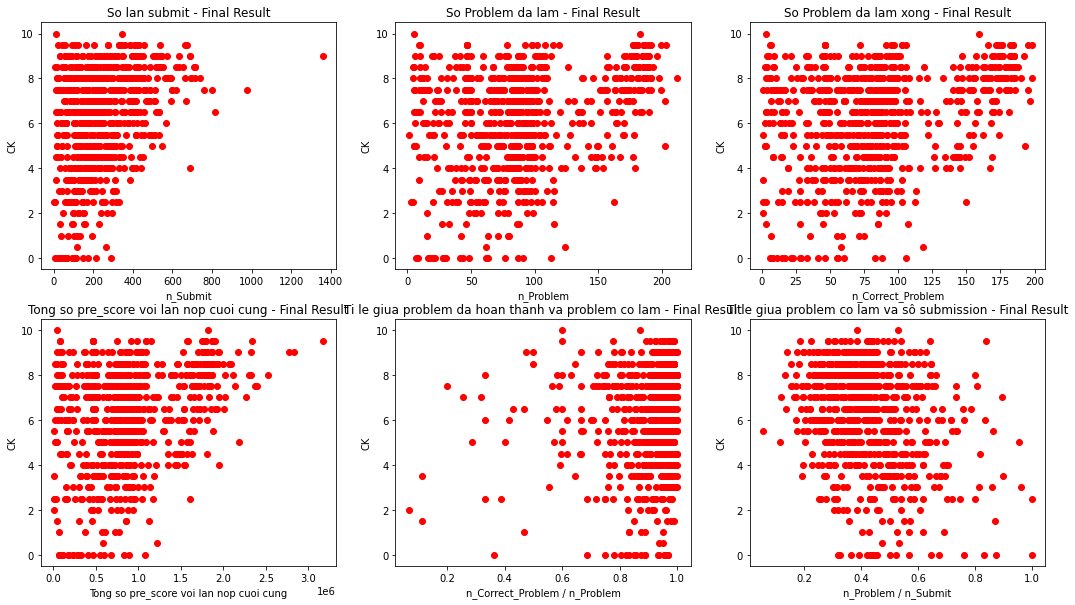

In [163]:
fig, ((axs1, axs2, axs3), (axs4, axs5, axs6), ) = plt.subplots(2,3, figsize = (18,10))
#
axs1.scatter(data_train['n_Submit'], data_train['CK'], c = 'red')
axs1.set_title('So lan submit - Final Result')
axs1.set(xlabel = 'n_Submit', ylabel = 'CK')
#
axs2.scatter(data_train['n_Problem'], data_train['CK'], c = 'red')
axs2.set_title('So Problem da lam - Final Result')
axs2.set(xlabel = 'n_Problem', ylabel = 'CK')
#
axs3.scatter(data_train['n_Correct_Problem'], data_train['CK'], c = 'red')
axs3.set_title('So Problem da lam xong - Final Result')
axs3.set(xlabel = 'n_Correct_Problem', ylabel = 'CK')
#
axs4.scatter(data_train['sum_pre_score_is_final'], data_train['CK'], c = 'red')
axs4.set_title('Tong so pre_score voi lan nop cuoi cung - Final Result')
axs4.set(xlabel = 'Tong so pre_score voi lan nop cuoi cung', ylabel = 'CK')
#
axs5.scatter(data_train['n_Correct_Problem / n_Problem'], data_train['CK'], c = 'red')
axs5.set_title('Ti le giua problem da hoan thanh va problem co lam - Final Result')
axs5.set(xlabel = 'n_Correct_Problem / n_Problem', ylabel = 'CK')
#
axs6.scatter(data_train['n_Problem / n_Submit'], data_train['CK'], c = 'red')
axs6.set_title('Ti le giua problem co lam va sô submission - Final Result')
axs6.set(xlabel = 'n_Problem / n_Submit', ylabel = 'CK')
plt.show()

#**6. Xây dựng model dự đoán điểm CK**

In [164]:
data_train

,user_id,n_Submit,n_Problem,n_Correct_Problem,sum_pre_score_is_final,n_Correct_Problem / n_Problem,n_Problem / n_Submit,CK
0,24,164,78,72.0,750299.0,0.923077,0.475610,9.5
1,27,13,5,3.0,39000.0,0.600000,0.384615,10.0
2,29,199,80,72.0,762760.0,0.900000,0.402010,8.5
3,34,218,84,81.0,822888.0,0.964286,0.385321,6.5
4,35,297,147,140.0,1477000.0,0.952381,0.494949,4.5
...,...,...,...,...,...,...,...,...
801,1856,64,31,23.0,270790.0,0.741935,0.484375,7.5
802,1857,55,34,33.0,386000.0,0.970588,0.618182,4.0
803,1859,31,27,3.0,39000.0,0.111111,0.870968,1.5
804,1862,12,6,4.0,40000.0,0.666667,0.500000,7.5


In [165]:
#data_merge.drop(columns = ['user_id'], axis =1,  inplace=True)
y = data_train['CK']
X = data_train.drop('CK', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train

,user_id,n_Submit,n_Problem,n_Correct_Problem,sum_pre_score_is_final,n_Correct_Problem / n_Problem,n_Problem / n_Submit
365,791,105,48,44.0,446909.0,0.916667,0.457143
267,571,161,87,86.0,868888.0,0.988506,0.540373
446,953,32,10,5.0,74250.0,0.500000,0.312500
333,715,239,102,93.0,972744.0,0.911765,0.426778
493,1061,178,98,97.0,978888.0,0.989796,0.550562
...,...,...,...,...,...,...,...
72,188,287,132,126.0,1348470.0,0.954545,0.459930
107,264,430,181,176.0,1792388.0,0.972376,0.420930
273,583,83,26,21.0,221833.0,0.807692,0.313253
441,942,135,71,59.0,603888.0,0.830986,0.525926


#**7. Train dữ liệu và dự đoán điểm cuối kỳ**

In [166]:
# Làm tròn điểm cuối kỳ
def x_round(x):
    x = np.round(x*2)/2
    return x

In [167]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
# Tính mean square error
y_pre = x_round(model.predict(X_test))

MSE = mean_squared_error(y_pre, y_test)
print(f'MSE: {MSE}')

MSE: 5.026729559748428


In [169]:
cols_train = ['user_id','n_Submit', 'n_Problem', 'n_Correct_Problem',	'sum_pre_score_is_final',	'n_Correct_Problem / n_Problem','n_Problem / n_Submit']
cols_train

['user_id',
 'n_Submit',
 'n_Problem',
 'n_Correct_Problem',
 'sum_pre_score_is_final',
 'n_Correct_Problem / n_Problem',
 'n_Problem / n_Submit']

In [170]:
data_predict['CK'] = x_round(model.predict(np.array(data_predict[cols_train])))
data_predict

,user_id,n_Submit,n_Problem,n_Correct_Problem,sum_pre_score_is_final,n_Correct_Problem / n_Problem,n_Problem / n_Submit,CK
0,51,86,39,38.0,380000.0,0.974359,0.453488,5.5
1,240,623,123,113.0,1309761.0,0.918699,0.197432,7.0
2,391,379,111,101.0,1059240.0,0.909910,0.292876,6.5
3,513,672,135,127.0,1319307.0,0.940741,0.200893,7.0
4,586,296,124,120.0,1238947.0,0.967742,0.418919,6.5
5,705,328,114,114.0,1180000.0,1.000000,0.347561,7.0
6,772,292,91,85.0,1200552.0,0.934066,0.311644,7.0
7,774,197,99,98.0,988888.0,0.989899,0.502538,6.0
8,776,264,98,97.0,998888.0,0.989796,0.371212,6.5
9,792,422,102,100.0,1602776.0,0.980392,0.241706,8.0
